## 2강 행렬, 색상, 필터

본 항목에서는 아래 항목들을 다룬다

+ 행렬 조작: 생성, 채우기, 요소 접근, ROI
+ 데이터 타입과 스케일 변환
+ numpy를 사용한 비이미지 데이터 영속성
+ 이미지 채널 조작
+ 이미지의 색 공간 변환
+ 감마 보정과 요소 단위의 수학
+ 평균/분산 이미지 정규화
+ 이미지 히스토그램
+ 가우시안 필터, 미디안 필터, 양방향 필터를 사용한 노이즈 제거
+ 이미지 경사도 계산
+ 가버 필터로 이미지 처리
+ 이산 푸리에 변환
+ 이미지 히스토그램
+ 가우시안 필터, 미디안 필터, 양방향 필터를 사용한 노이즈 제거
+ 이미지 경사도 계산
+ 가버 필터로 이미지 처리
+ 이산 푸리에 변환
+ 이진 연산

In [1]:
from cv2 import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('../data/chaewon.jpg')

In [15]:
image = np.full((480, 640, 3), 255, np.uint8) # 3차원 배열. numpy shape은 뒤에서 부터 읽는다. 3크기의 리스트가 640개 있는게 480개 있다.
                                              # 즉 픽셀당 3개의 정보가 있고, 그 픽셀이 640*480개(가로*세로, width*height, 열*행)(높이,너비,채널)
cv2.imshow('white', image)
cv2.waitKey()
cv2.destroyAllWindows()

image = np.full((480, 640, 3), (30, 30, 200), np.uint8)
cv2.imshow('red', image)
cv2.waitKey()
cv2.destroyAllWindows()

image.fill(0)
cv2.imshow('black', image)
cv2.waitKey()
cv2.destroyAllWindows()

image[240, 160] = image[240, 420] = image[240, 480] = (255,255,255)
cv2.imshow('black with white pixels', image)
cv2.waitKey()
cv2.destroyAllWindows()

image[:,:,0] = 255
cv2.imshow('blue with white pixels', image)
cv2.waitKey()
cv2.destroyAllWindows()

image[:, 320, :] = 255
cv2.imshow('blue with white line', image)
cv2.waitKey()
cv2.destroyAllWindows()

image[100:600, 100:200, 2] = 255
cv2.imshow('image', image)
cv2.waitKey()
cv2.destroyAllWindows()


In [19]:
print('Shape: ', image.shape)
print('Data type: ', image.dtype)

cv2.imshow('test',image)
cv2.waitKey()
cv2.destroyAllWindows()

image = image.astype(np.float32) / 255      # uint8은 범위가 0~255 이지만. float은 0~1이다
print('Shape: ', image.shape)
print('Data type: ', image.dtype)

cv2.imshow('image', np.clip(image*2, 0, 1)) # np.clip(np.array(), min, max) min보다 작으면 min으로 대체, max보다 크면 max로 대체
cv2.waitKey()
cv2.destroyAllWindows()

image = (image*255).astype(np.uint8)
print('Shape', image.shape) 
print('Data type:', image.dtype)

cv2.imshow('image', image)
cv2.waitKey()
cv2.destroyAllWindows()

Shape:  (960, 960, 3)
Data type:  uint8
Shape:  (960, 960, 3)
Data type:  float32
Shape (960, 960, 3)
Data type: uint8


In [27]:
mat = np.random.rand(100, 100).astype(np.float32) # .randint: 균일 분포 정수 난수 1개 생성
                                                  # rand 0부터 1사이의 균일분포에서 난수 matrix array 생성
                                                  # randn 가우시안 표준 정규 분포에서 난수 matrix array 생성
print('Shape: ', mat.shape)
print('Data type: ', mat.dtype)
np.savetxt('mat.csv', mat)
mat = np.loadtxt('mat.csv').astype(np.float32)    # astype(np.float32)를 안하면 float64로 읽어들임
print('Shape: ', mat.shape)
print('Data type: ', mat.dtype)

Shape:  (100, 100)
Data type:  float32
Shape:  (100, 100)
Data type:  float32


In [42]:
image = cv2.imread('../data/minguri.jpg').astype(np.float32) / 255
print('Shape: ', image.shape)
cv2.namedWindow('Blue', cv2.WINDOW_NORMAL)
cv2.namedWindow('Green', cv2.WINDOW_NORMAL)
cv2.namedWindow('Red', cv2.WINDOW_NORMAL)
cv2.imshow('Blue', image[:,:,[0]])
cv2.imshow('Green', image[:,:,[1]])
cv2.imshow('Red', image[:,:,[2]])
# image[:,:,[2]], image[:, :, [0]] = image[:,:,[0]], image[:,:,[2]].copy()       # 손쉽게 자료를 교체할 수 있다
image[:, :, [2, 0]] = image[:, :, [0, 2]]                                        # 위 코드와 똑같이 동작한다.
cv2.imshow('blue_and_red_swapped', image)
cv2.waitKey()
cv2.destroyAllWindows()

image[:, :, [0, 2]] = image[:, :, [2, 0]]
image[:, :, 0] = (image[:, :, 0]*0.9).clip(0, 1)
image[:, :, 1] = (image[:, :, 1]*1.1).clip(0, 1)
cv2.imshow('image', image)
cv2.waitKey()
cv2.destroyAllWindows()


Shape:  (736, 736, 3)


In [54]:
image = cv2.imread('../data/minguri.jpg').astype(np.float32) / 255
print('Shape: ', image.shape)
print('Data type: ',image.dtype)

gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
print('Converted to grayscale')
print('Shape: ', image.shape)
print('Data type: ',image.dtype)
cv2.imshow('gray', gray)
cv2.waitKey()
cv2.destroyAllWindows()

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
print('Converted to HSV')
print('Shape: ', hsv.shape)
print('Data type: ',hsv.dtype)
cv2.imshow('hsv', hsv)
cv2.waitKey()
cv2.destroyAllWindows()

hsv[:,:,2] *= 1
from_hsv = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
print('Converted back to HSV')
print('Shape: ', from_hsv.shape)
print('Data type: ',from_hsv.dtype)
cv2.imshow('from_hsv', from_hsv)
cv2.waitKey()
cv2.destroyAllWindows()


Shape:  (736, 736, 3)
Data type:  float32
Converted to grayscale
Shape:  (736, 736, 3)
Data type:  float32
Converted to HSV
Shape:  (736, 736, 3)
Data type:  float32
Converted back to HSV
Shape:  (736, 736, 3)
Data type:  float32


In [8]:
image = cv2.imread('../data/chaewon.jpg', 0).astype(np.float32) / 255 # imread시 flags: 0 = gray, 1 = color(BRG)

gamma = 0.5
corrected_image = np.power(image, gamma)    # 현재 float32 이므로 0~1사이 값이라 power(gamma)값이 클수록 image가 어두워짐

cv2.imshow('image', image)
cv2.imshow('corrected_image', corrected_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [16]:
image = cv2.imread('../data/chaewon.jpg').astype(np.float32) / 255
image -= image.mean()   # 평균을 빼서 평균값을 0으로 맞추고
image /= image.std()    # 표준편차로 나눈다                     #?? 
cv2.imshow('image', image)
cv2.waitKey()
cv2.destroyAllWindows()

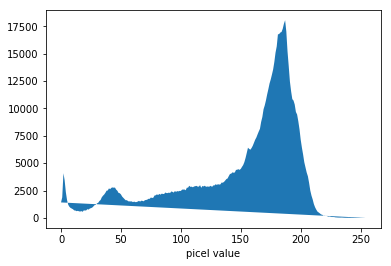

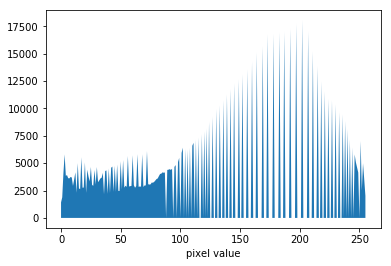

In [11]:
gray = cv2.imread('../data/chaewon.jpg', 0)
cv2.imshow('original gray', gray)
cv2.waitKey()
cv2.destroyAllWindows()
hist, bins = np.histogram(gray, 255, [0, 255])
np.clip(hist, 0, 1000000)   # 음수값이 있나? -> 없다

plt.fill(hist)
plt.xlabel('picel value')
plt.show()                  # 왜 시작점이 기울어져있지? 
                            # 음수값이 있나? -> 없다

gray_eq = cv2.equalizeHist(gray)

hist, bins = np.histogram(gray_eq, 256, [0, 256])
plt.fill_between(range(256), hist, 0)
plt.xlabel('pixel value')
plt.show()

cv2.imshow('original gray_eq', gray_eq)
cv2.waitKey()
cv2.destroyAllWindows()

color = cv2.imread('../data/chaewon.jpg')
hsv = cv2.cvtColor(color, cv2.COLOR_BGR2HSV)

hsv[..., 2] = cv2.equalizeHist(hsv[..., 2])     # 단일 채널 이미지만 처리할 수 있다
                                                # hsv중 2번째 채널이 v(Bright)라서 이걸로 평활을 하고
                                                # 다시 bgr로 변환하면 히스토그램 평활화를 수행할 수 있다. (똑똑하다)
color_eq = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
cv2.imshow('original color', color)
cv2.imshow('equalized color', color_eq)
cv2.waitKey()
cv2.destroyAllWindows()


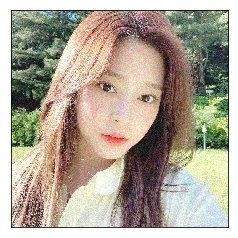

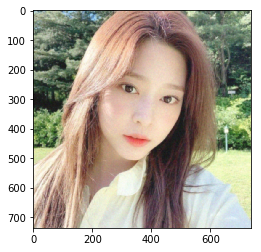

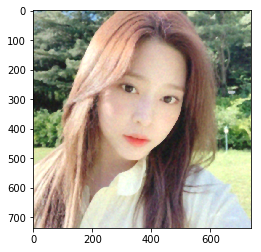

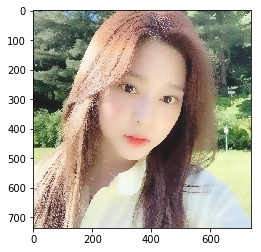

In [17]:
image = cv2.imread('../data/minguri.jpg').astype(np.float32) / 255
noised_image = (image + 0.2 * np.random.rand(*image.shape).astype(np.float32))
noised_image = noised.clip(0,1) 
plt.imshow(noised_image[:, :, [2, 1, 0]]) # BGR -> RGB, matplotlib은 RGB 순서라서 그렇다
plt.xticks([])
plt.yticks([])
plt.show()

gauss_blur = cv2.GaussianBlur(noised_image, (7, 7), 0)  # 0들어간 자리는 표준 편차 매개 변수이다.
plt.imshow(gauss_blur[:, :, [2,1,0]])                   # 0은 커널 크기로 표준 편차가 계산된다.
plt.show()

median_blur = cv2.medianBlur((noised_image * 255).astype(np.uint8), 7)
plt.imshow(median_blur[:, :, [2, 1, 0]])
plt.show()

bilat = cv2.bilateralFilter(noised_image, -1, 0.3, 10)
plt.imshow(bilat[:, :, [2,1,0]])
plt.show()

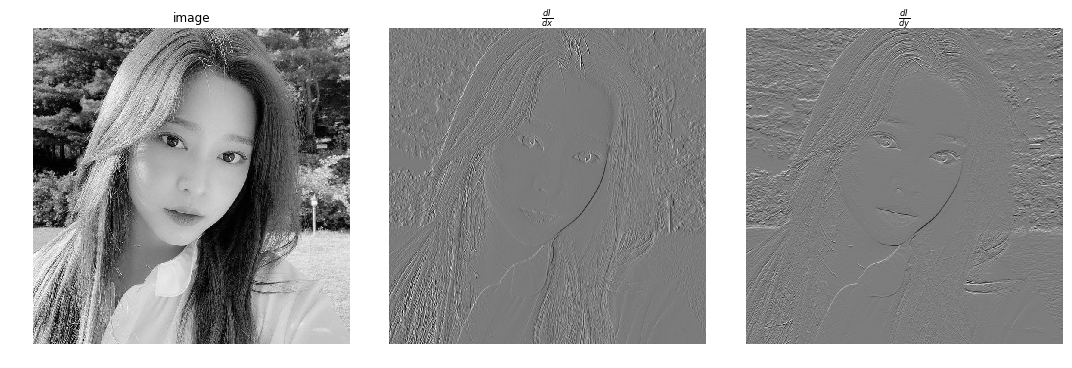

In [40]:
gray_image = cv2.imread('../data/minguri.jpg', 0)

dx = cv2.Sobel(gray_image, cv2.CV_32F, 1, 0)
dy = cv2.Sobel(gray_image, cv2.CV_32F, 0, 1)

plt.figure(figsize=(15, 8)) # 보여줄 플롯의 크기

plt.subplot(131)
plt.axis('off')
plt.title('image')
plt.imshow(gray_image, cmap='gray')

plt.subplot(132)
plt.axis('off')
plt.imshow(dx, cmap='gray')
plt.title(r'$\frac{dI}{dx}$')

plt.subplot(133)
plt.axis('off')
plt.title(r'$\frac{dI}{dy}$')
plt.imshow(dy, cmap='gray')
plt.tight_layout()
plt.show()

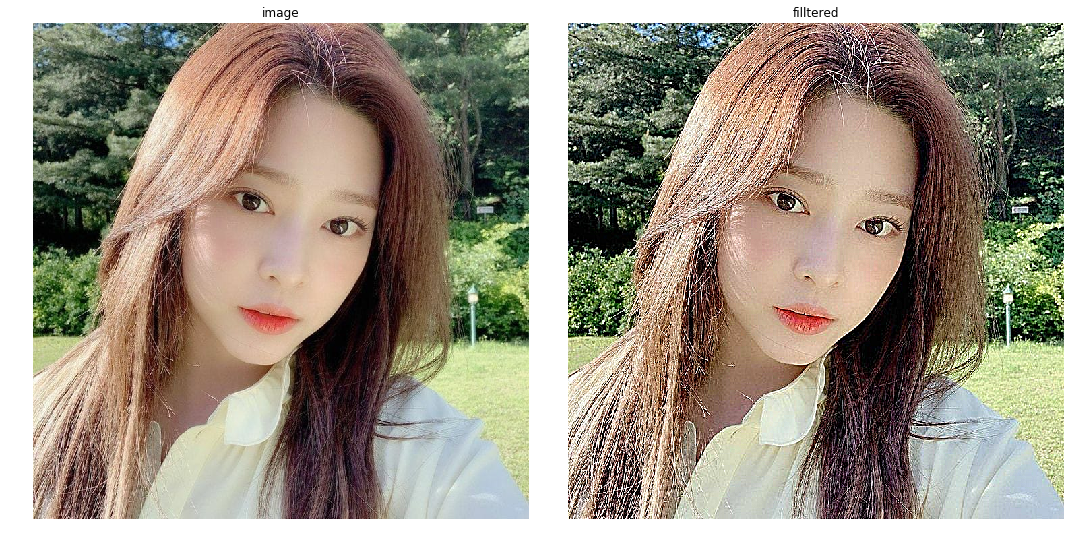

In [33]:
import math
image = cv2.imread("../data/minguri.jpg")

KSIZE = 11
ALPHA = 2
kernel = cv2.getGaussianKernel(KSIZE, 0)
kernel = -ALPHA * kernel @ kernel.T
kernel[KSIZE//2, KSIZE//2] += 1 + ALPHA
filtered = cv2.filter2D(image, -1, kernel)  # 높은 주파수를 강조하는 선명화 커널을 구성했다는데, 뒤에서 확인해보자

plt.figure(figsize=(15,8))
plt.subplot(121)
plt.axis('off')
plt.title('image')
plt.imshow(image[:, :, [2,1,0]])
plt.subplot(122)
plt.axis('off')
plt.title('filltered')
plt.imshow(filtered[:, :, [2,1,0]])
plt.tight_layout(True)
plt.show()

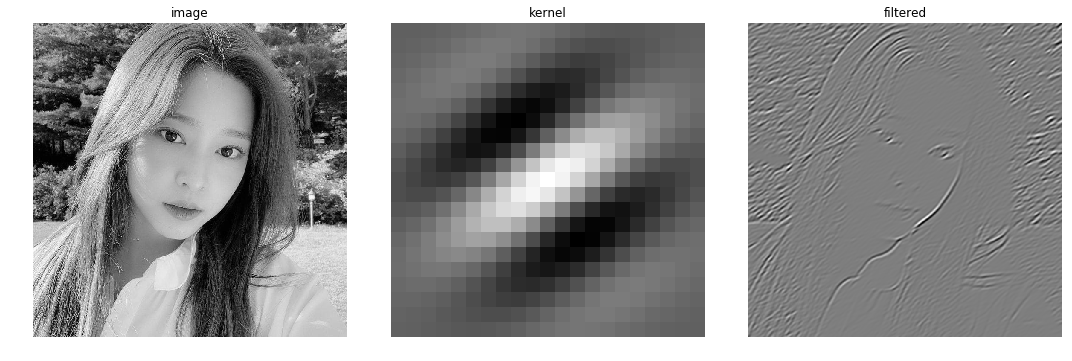

In [44]:
import math

image = cv2.imread('../data/minguri.jpg', 0).astype(np.float32) / 255

kernel = cv2.getGaborKernel((21, 21), 5, 1, 10, 1, 0, cv2.CV_32F) # 커널 크기, 가우시안 표준 편차, 파형방향, 파형 길이, 공간 비율, 위상
                                                                  # 이미지의 방향을 아는 경우, 에지 검출에 유용하
kernel /= math.sqrt((kernel * kernel).sum()) # ...? kernel 끼리는 곱해진다

filtered = cv2.filter2D(image, -1, kernel)

plt.figure(figsize=(15, 8))
plt.subplot(131)
plt.axis('off')
plt.title('image')
plt.imshow(image, cmap='gray')
plt.subplot(132)
plt.axis('off')
plt.title('kernel')
plt.imshow(kernel, cmap='gray')
plt.subplot(133)
plt.axis('off')
plt.title('filtered')
plt.imshow(filtered, cmap='gray')
plt.tight_layout()
plt.show()

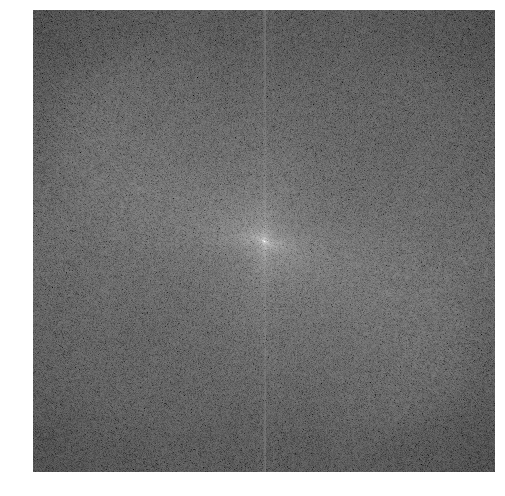

In [51]:
image = cv2.imread("../data/minguri.jpg", 0).astype(np.float32) /255
fft = cv2.dft(image, flags=cv2.DFT_COMPLEX_OUTPUT)
shifted = np.fft.fftshift(fft, axes=[0, 1])
magnitude = cv2.magnitude(shifted[:, :, 0], shifted[:, :, 1])
magnitude = np.log(magnitude)

plt.figure(figsize=(15, 7))
plt.axis('off')
plt.imshow(magnitude, cmap='gray')
plt.tight_layout()
plt.show()

restored = cv2.idft(fft, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT)

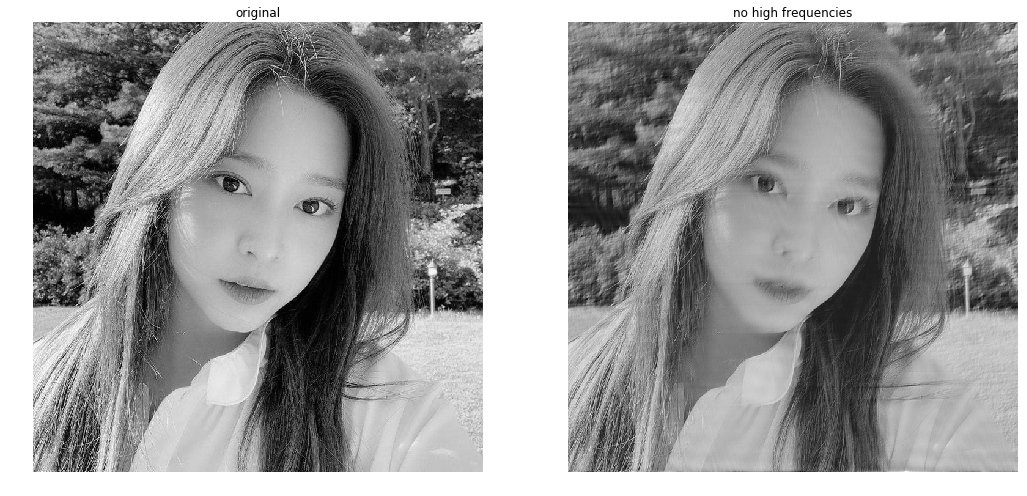

In [52]:
image = cv2.imread('../data/minguri.jpg', 0).astype(np.float32) / 255

fft = cv2.dft(image, flags = cv2.DFT_COMPLEX_OUTPUT)

fft_shift = np.fft.fftshift(fft, axes=[0,1])

sz = 25
mask = np.zeros(fft_shift.shape, np.uint8)
mask[mask.shape[0]//2-sz:mask.shape[0]] = 1
fft_shift *= mask

fft = np.fft.ifftshift(fft_shift, axes=[0,1])
filtered = cv2.idft(fft, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT)

plt.figure(figsize=(15, 7))
plt.subplot(121)
plt.axis('off')
plt.title('original')
plt.imshow(image, cmap='gray')
plt.subplot(122)
plt.axis('off')
plt.title('no high frequencies')
plt.imshow(filtered, cmap='gray')
plt.tight_layout()
plt.show()


Threshold used:  200.0


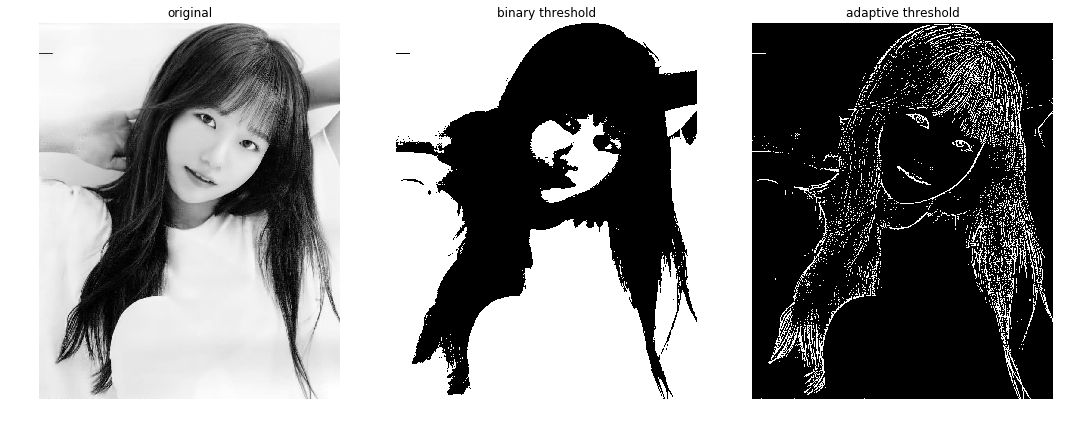

In [3]:
image = cv2.imread("../data/jjoyul.jpg", 0)
thr, mask = cv2.threshold(image, 200, 1, cv2.THRESH_BINARY)
# threshold(src, thresh, maxval, type, dst=None)
# maxval => threshold보다 큰 값이 있을 때 변환 될 값. 1인걸 보니 이건 float형식으로 저장되나 보다
print('Threshold used: ', thr)

adapt_mask = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 10)  
# adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C)
# adaptiveMethod의 종류:
#   1. cv2.ADAPTIVE_THRESH_MEAN_C: 
#      적용할 픽셀을 중심으로 하는 blocksize x blocksize 안에 있는 픽셀 값의 평균에서 C를 뺀 값을 문턱으로 함
#      특정 지역의 평균값에서 C를 뺀 값
#   2. cv2.ADAPTIVE_THRESH_GAUSSIAN_C
#      적용할 픽셀을 중심으로 blocksize x blocksize 안에 있는 Gaussian 윈도우 기반 가중치들의 합에서 C를 뺀 값을 문턱값으로 함
#      특정 지역의 가우시안 분포 가중치의 합에서 C를 뺀 값
#      가우시안 분포 = 정규 분포

plt.figure(figsize=(15, 7))
plt.subplot(131)
plt.axis('off')
plt.title('original')
plt.imshow(image, cmap='gray')
plt.subplot(132)
plt.axis('off')
plt.title('binary threshold')
plt.imshow(mask, cmap='gray')
plt.subplot(133)
plt.axis('off')
plt.title('adaptive threshold')
plt.imshow(adapt_mask, cmap='gray')
plt.tight_layout()
plt.show()


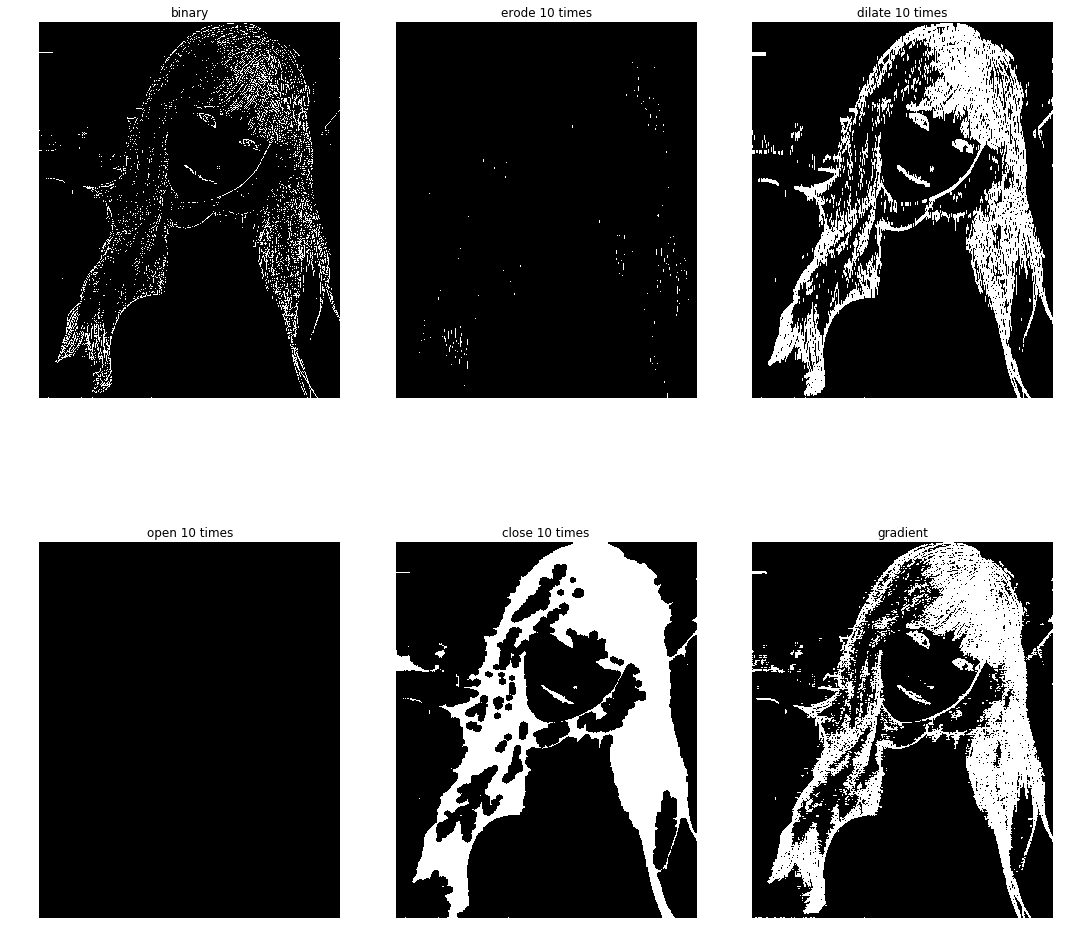

In [8]:
image = cv2.imread('../data/jjoyul.jpg', 0)
_, binary = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY) # 책에 이부분이 (image, -1, 1, ...) 로 되어있는데
                                                              # -1 부분은 임계값, 1은 maxval인데 당연히 검은 화면으로만 나옴...
                                                              # 마음대로 정했다(최대값은 255로)

adaptive_binary = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 10)  # 책에 없는 부분
# adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C)

binary = adaptive_binary    # 책에 없는 부분

cv2.imshow('binary', binary)
cv2.waitKey()
cv2.destroyAllWindows()

eroded = cv2.morphologyEx(binary, cv2.MORPH_ERODE, (3, 3), iterations=10)
dilated = cv2.morphologyEx(binary, cv2.MORPH_DILATE, (3, 3), iterations=10)

opened = cv2.morphologyEx(binary, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)), iterations=5)
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)), iterations=5)

grad = cv2.morphologyEx(binary, cv2.MORPH_GRADIENT, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5)))

plt.figure(figsize=(15, 15))
plt.subplot(231)
plt.axis('off')
plt.title('binary')
plt.imshow(binary, cmap='gray')

plt.subplot(232)
plt.axis('off')
plt.title('erode 10 times')
plt.imshow(eroded, cmap='gray')

plt.subplot(233)
plt.axis('off')
plt.title('dilate 10 times')
plt.imshow(dilated, cmap='gray')

plt.subplot(234)
plt.axis('off')
plt.title('open 5 times')
plt.imshow(opened, cmap='gray')

plt.subplot(235)
plt.axis('off')
plt.title('close 5 times')
plt.imshow(closed, cmap='gray')

plt.subplot(236)
plt.axis('off')
plt.title('gradient')
plt.imshow(grad, cmap='gray')

plt.tight_layout()
plt.show()
